First we load a few libraries. csv is used to load the dataset.

In [101]:
import numpy as np
import csv
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

The dataset is a series of 8 measurements related to pulsars (columns 0,...,7). The last column says if the object is a pulsar (1), or not (0). It contains 16,259 spurious examples caused by noise, and 1,639	real pulsars. More details can be found in the `Readme.txt` of the `htru2` folder.

In [2]:
#Opens the data
with open('htru2/HTRU_2.csv', 'r') as f:
    reader = csv.reader(f)
    _data = list(reader)

#Converts it to a numpy array
data = np.array(_data, dtype=np.float32)
x = data[:,0:7] #Measurements
y = data[:,8] #Label

We start with a PCA with three components:

In [97]:
pca = PCA(n_components=3) #Starting the PCA
pca.fit(x) #Fitting the measurements

PCA(n_components=3)

Let us see how much of the variance each component captures:

In [90]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_) #More than 97% of the variance. Great!

[0.64110017 0.27904388 0.05398664]


0.9741306900978088

Let us then use the PCA to reduce the dimensionality of our data:

In [98]:
reduced_x = pca.fit_transform(x)

Now some visualizations. Here, we make a scatter plot in 2D. The third dimension is represented by the color.

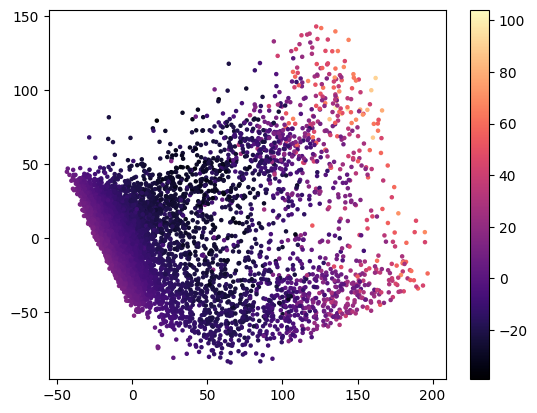

In [99]:
sc = plt.scatter(reduced_x[:,0],reduced_x[:,1],c=reduced_x[:,2],s=5,cmap='magma')
plt.colorbar(sc)
plt.show()

Now we discard the third dimension and use the color to see if the object is a pulsar or not. There is a nice spatial separation, where the pulsars appear concentrated in the lower branch.

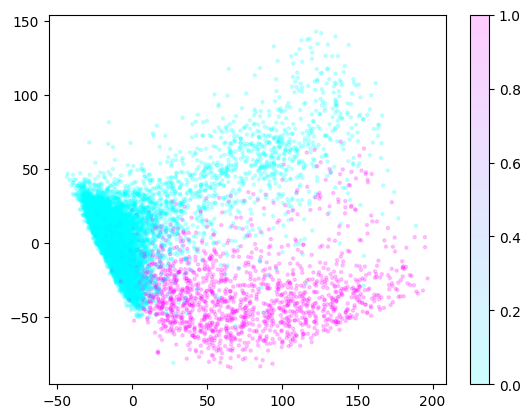

In [100]:
sc = plt.scatter(reduced_x[:,0],reduced_x[:,1],c=y,s=5,alpha=0.2,cmap='cool')
plt.colorbar(sc)
plt.show()

Now let us perform the clustering. We would hope

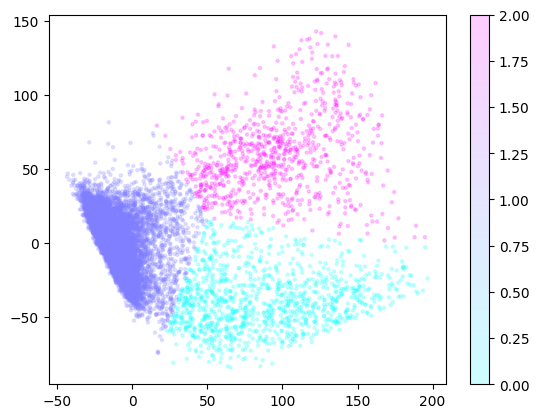

In [320]:
kmeans = KMeans(n_clusters=3, n_init='auto')
y_kmeans = kmeans.fit_predict(reduced_x)
sc = plt.scatter(reduced_x[:,0],reduced_x[:,1],c=y_kmeans,s=5,alpha=0.2,cmap='cool')
plt.colorbar(sc)
plt.show()

In [308]:
def _true_positives(y1,y2):
    if y1 == 1 and y2 == 1:
        return 1
    else:
        return 0

true_positives = np.vectorize(_true_positives)

def _false_positives(y1,y2):
    if y1 == 0 and y2 == 1:
        return 1
    else:
        return 0

false_positives = np.vectorize(_false_positives)

def _make_binary(y,cluster):
    if y == cluster:
        return 1
    else:
        return 0

make_binary = np.vectorize(_make_binary)

def format(y,y_kmeans,n_clusters):
    corrects = np.zeros(n_clusters)

    for cluster in range(n_clusters):
        fy_kmeans = make_binary(y_kmeans,cluster)
        corrects[cluster] = true_positives(y,fy_kmeans).sum()
    
    cluster = np.argmax(corrects,axis=0)
    return make_binary(y_kmeans,cluster)

In [326]:
n_clusters = 3
kmeans = KMeans(n_clusters, n_init='auto')
y_kmeans = kmeans.fit_predict(reduced_x)
fy_kmeans = format(y,y_kmeans,3)
true_positives(y,fy_kmeans).sum() / sum(y == 1)
false_positives(y,fy_kmeans).sum() / sum(y == 1)

0.04270896888346553